In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("ML_Classification_Lo.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [6]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Feature Extraction

In [11]:
X= df.drop("left",axis=1)
y= df["left"]

In [12]:
# dummy encoding

In [13]:
X.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [14]:
X= pd.get_dummies(X,columns=["salary"],prefix_sep="Salary",drop_first=True)

In [15]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salarySalarylow,salarySalarymedium
0,0.38,0.53,2,157,3,0,0,sales,1,0
1,0.80,0.86,5,262,6,0,0,sales,0,1
2,0.11,0.88,7,272,4,0,0,sales,0,1
3,0.72,0.87,5,223,5,0,0,sales,1,0
4,0.37,0.52,2,159,3,0,0,sales,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,1,0
14995,0.37,0.48,2,160,3,0,0,support,1,0
14996,0.37,0.53,2,143,3,0,0,support,1,0
14997,0.11,0.96,6,280,4,0,0,support,1,0


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
X["Department"]=le.fit_transform(X["Department"])

In [19]:
X["Department"].value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: Department, dtype: int64

In [20]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=42,shuffle=True)

In [22]:
X_train.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                 int32
salarySalarylow            uint8
salarySalarymedium         uint8
dtype: object

In [23]:
X_train.shape

(11999, 10)

In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [25]:
X_train.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salarySalarylow          0
salarySalarymedium       0
dtype: int64

In [26]:
# model initializing

In [27]:
model= LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8023168597383116
0.8076666666666666


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
pred= model.predict(X_test)

In [32]:
cm= confusion_matrix(y_test,pred)
print(cm)

[[2122  164]
 [ 413  301]]


In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
pre= precision_score(y_test,pred)
recall= recall_score(y_test,pred)
print(pre)
print(recall)

0.6473118279569893
0.4215686274509804


In [35]:
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

In [36]:
print("True_negative",tn)
print("False_Positive",fp)
print("False_negative",fn)
print("True_Positive",tp)

True_negative 2122
False_Positive 164
False_negative 413
True_Positive 301


In [37]:
prob= model.predict_proba(X_test)

In [38]:
y_test

6910     0
2860     0
6286     0
12838    0
13692    0
        ..
6736     0
5093     0
6841     0
6413     0
10564    0
Name: left, Length: 3000, dtype: int64

In [39]:
prob

array([[0.9362328 , 0.0637672 ],
       [0.93616795, 0.06383205],
       [0.71556643, 0.28443357],
       ...,
       [0.87675663, 0.12324337],
       [0.83301206, 0.16698794],
       [0.91039985, 0.08960015]])

In [40]:
prob[:,1]

array([0.0637672 , 0.06383205, 0.28443357, ..., 0.12324337, 0.16698794,
       0.08960015])

In [41]:
new_df= pd.DataFrame()
new_df["Actual_value"]=y_test
new_df["Predicted_value"]= pred
new_df["Probablity_score"]= prob[:,1]

In [42]:
new_df

,Actual_value,Predicted_value,Probablity_score
6910,0,0,0.063767
2860,0,0,0.063832
6286,0,0,0.284434
12838,0,0,0.041439
13692,0,0,0.043569
...,...,...,...
6736,0,0,0.096431
5093,0,0,0.020591
6841,0,0,0.123243
6413,0,0,0.166988


In [43]:
number= [i/10 for i in range(1,10)]
print(number)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [44]:
for i in number:
    new_df[i]= new_df.Probablity_score.map(lambda x: 1 if x>i else 0)

In [45]:
new_df

,Actual_value,Predicted_value,Probablity_score,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6910,0,0,0.063767,0,0,0,0,0,0,0,0,0
2860,0,0,0.063832,0,0,0,0,0,0,0,0,0
6286,0,0,0.284434,1,1,0,0,0,0,0,0,0
12838,0,0,0.041439,0,0,0,0,0,0,0,0,0
13692,0,0,0.043569,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6736,0,0,0.096431,0,0,0,0,0,0,0,0,0
5093,0,0,0.020591,0,0,0,0,0,0,0,0,0
6841,0,0,0.123243,1,0,0,0,0,0,0,0,0
6413,0,0,0.166988,1,0,0,0,0,0,0,0,0


In [46]:
metric= pd.DataFrame(columns=["Numbers","Accuracy","Precision","Sensitivity","Specificity"])

In [47]:
metric

,Numbers,Accuracy,Precision,Sensitivity,Specificity


In [48]:
for i in number:
    tn, fp, fn, tp = confusion_matrix(y_test,new_df[i]).ravel()
    total= tn+fp+fn+tp
    
    Accuracy=(tn+tp)/total
    Precision= tp/(tp+fp)
    Sensitivity= tp/(tp+fn)
    Specificity= tn/(tn+fp)
    
    metric.loc[i]= [i,Accuracy,Precision,Sensitivity,Specificity]

In [49]:
metric

,Numbers,Accuracy,Precision,Sensitivity,Specificity
0.1,0.1,0.549000,0.338880,0.941176,0.426509
0.2,0.2,0.703667,0.431587,0.773109,0.681977
0.3,0.3,0.795333,0.555928,0.696078,0.826334
0.4,0.4,0.816333,0.625966,0.567227,0.894138
0.5,0.5,0.807667,0.647312,0.421569,0.928259
0.6,0.6,0.774667,0.576000,0.201681,0.953631
0.7,0.7,0.769333,0.588710,0.102241,0.977690
0.8,0.8,0.759333,0.214286,0.004202,0.995188
0.9,0.9,0.762000,NaN,0.000000,1.000000


In [50]:
# Auc Score

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
auc= roc_auc_score(new_df["Actual_value"],new_df["Probablity_score"])

In [53]:
auc

0.8190679596422995

In [54]:
from sklearn.metrics import roc_curve

In [55]:
fpr, tpr, thresholds = roc_curve(new_df["Actual_value"],new_df["Probablity_score"])

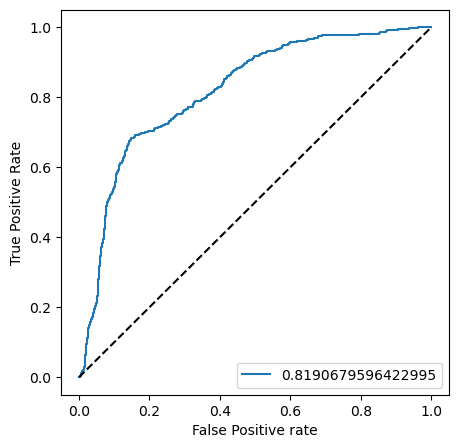

In [56]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label=auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4);

In [57]:
# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dc= DecisionTreeClassifier()

In [60]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
dc.score(X_test,y_test)

0.9763333333333334

In [62]:
dc.score(X_train,y_train)

1.0

In [63]:
# Random Forest 

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc= RandomForestClassifier()

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
rfc.score(X_train,y_train)

1.0

In [68]:
rfc.score(X_test,y_test)

0.991

In [69]:
confusion= confusion_matrix(y_test,rfc.predict(X_test))
confusion

array([[2283,    3],
       [  24,  690]], dtype=int64)

In [70]:
from sklearn.svm import SVC

In [71]:
sv= SVC()

In [72]:
sv.fit(X_train,y_train)

SVC()

In [73]:
sv.score(X_train,y_train)

0.7846487207267272

In [74]:
sv.score(X_test,y_test)

0.7853333333333333